Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler as ss
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import Pool, CatBoostClassifier
from IPython.core.display import display, HTML
from sklearn import metrics

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 20)

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';')

# Обзор данных

In [3]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df_red[:1].to_dict(orient='records')

[{'fixed acidity': 7.4,
  'volatile acidity': 0.7,
  'citric acid': 0.0,
  'residual sugar': 1.9,
  'chlorides': 0.076,
  'free sulfur dioxide': 11.0,
  'total sulfur dioxide': 34.0,
  'density': 0.9978,
  'pH': 3.51,
  'sulphates': 0.56,
  'alcohol': 9.4,
  'quality': 5}]

In [25]:
list(df_red.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [15]:
df_red.shape

(1599, 12)

In [6]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

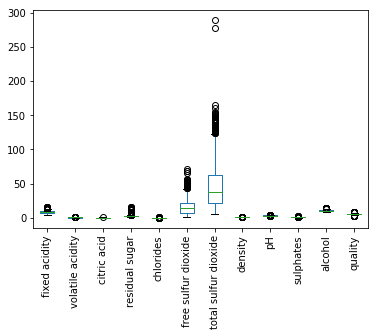

In [10]:
df_red.plot(kind='box', rot=90)

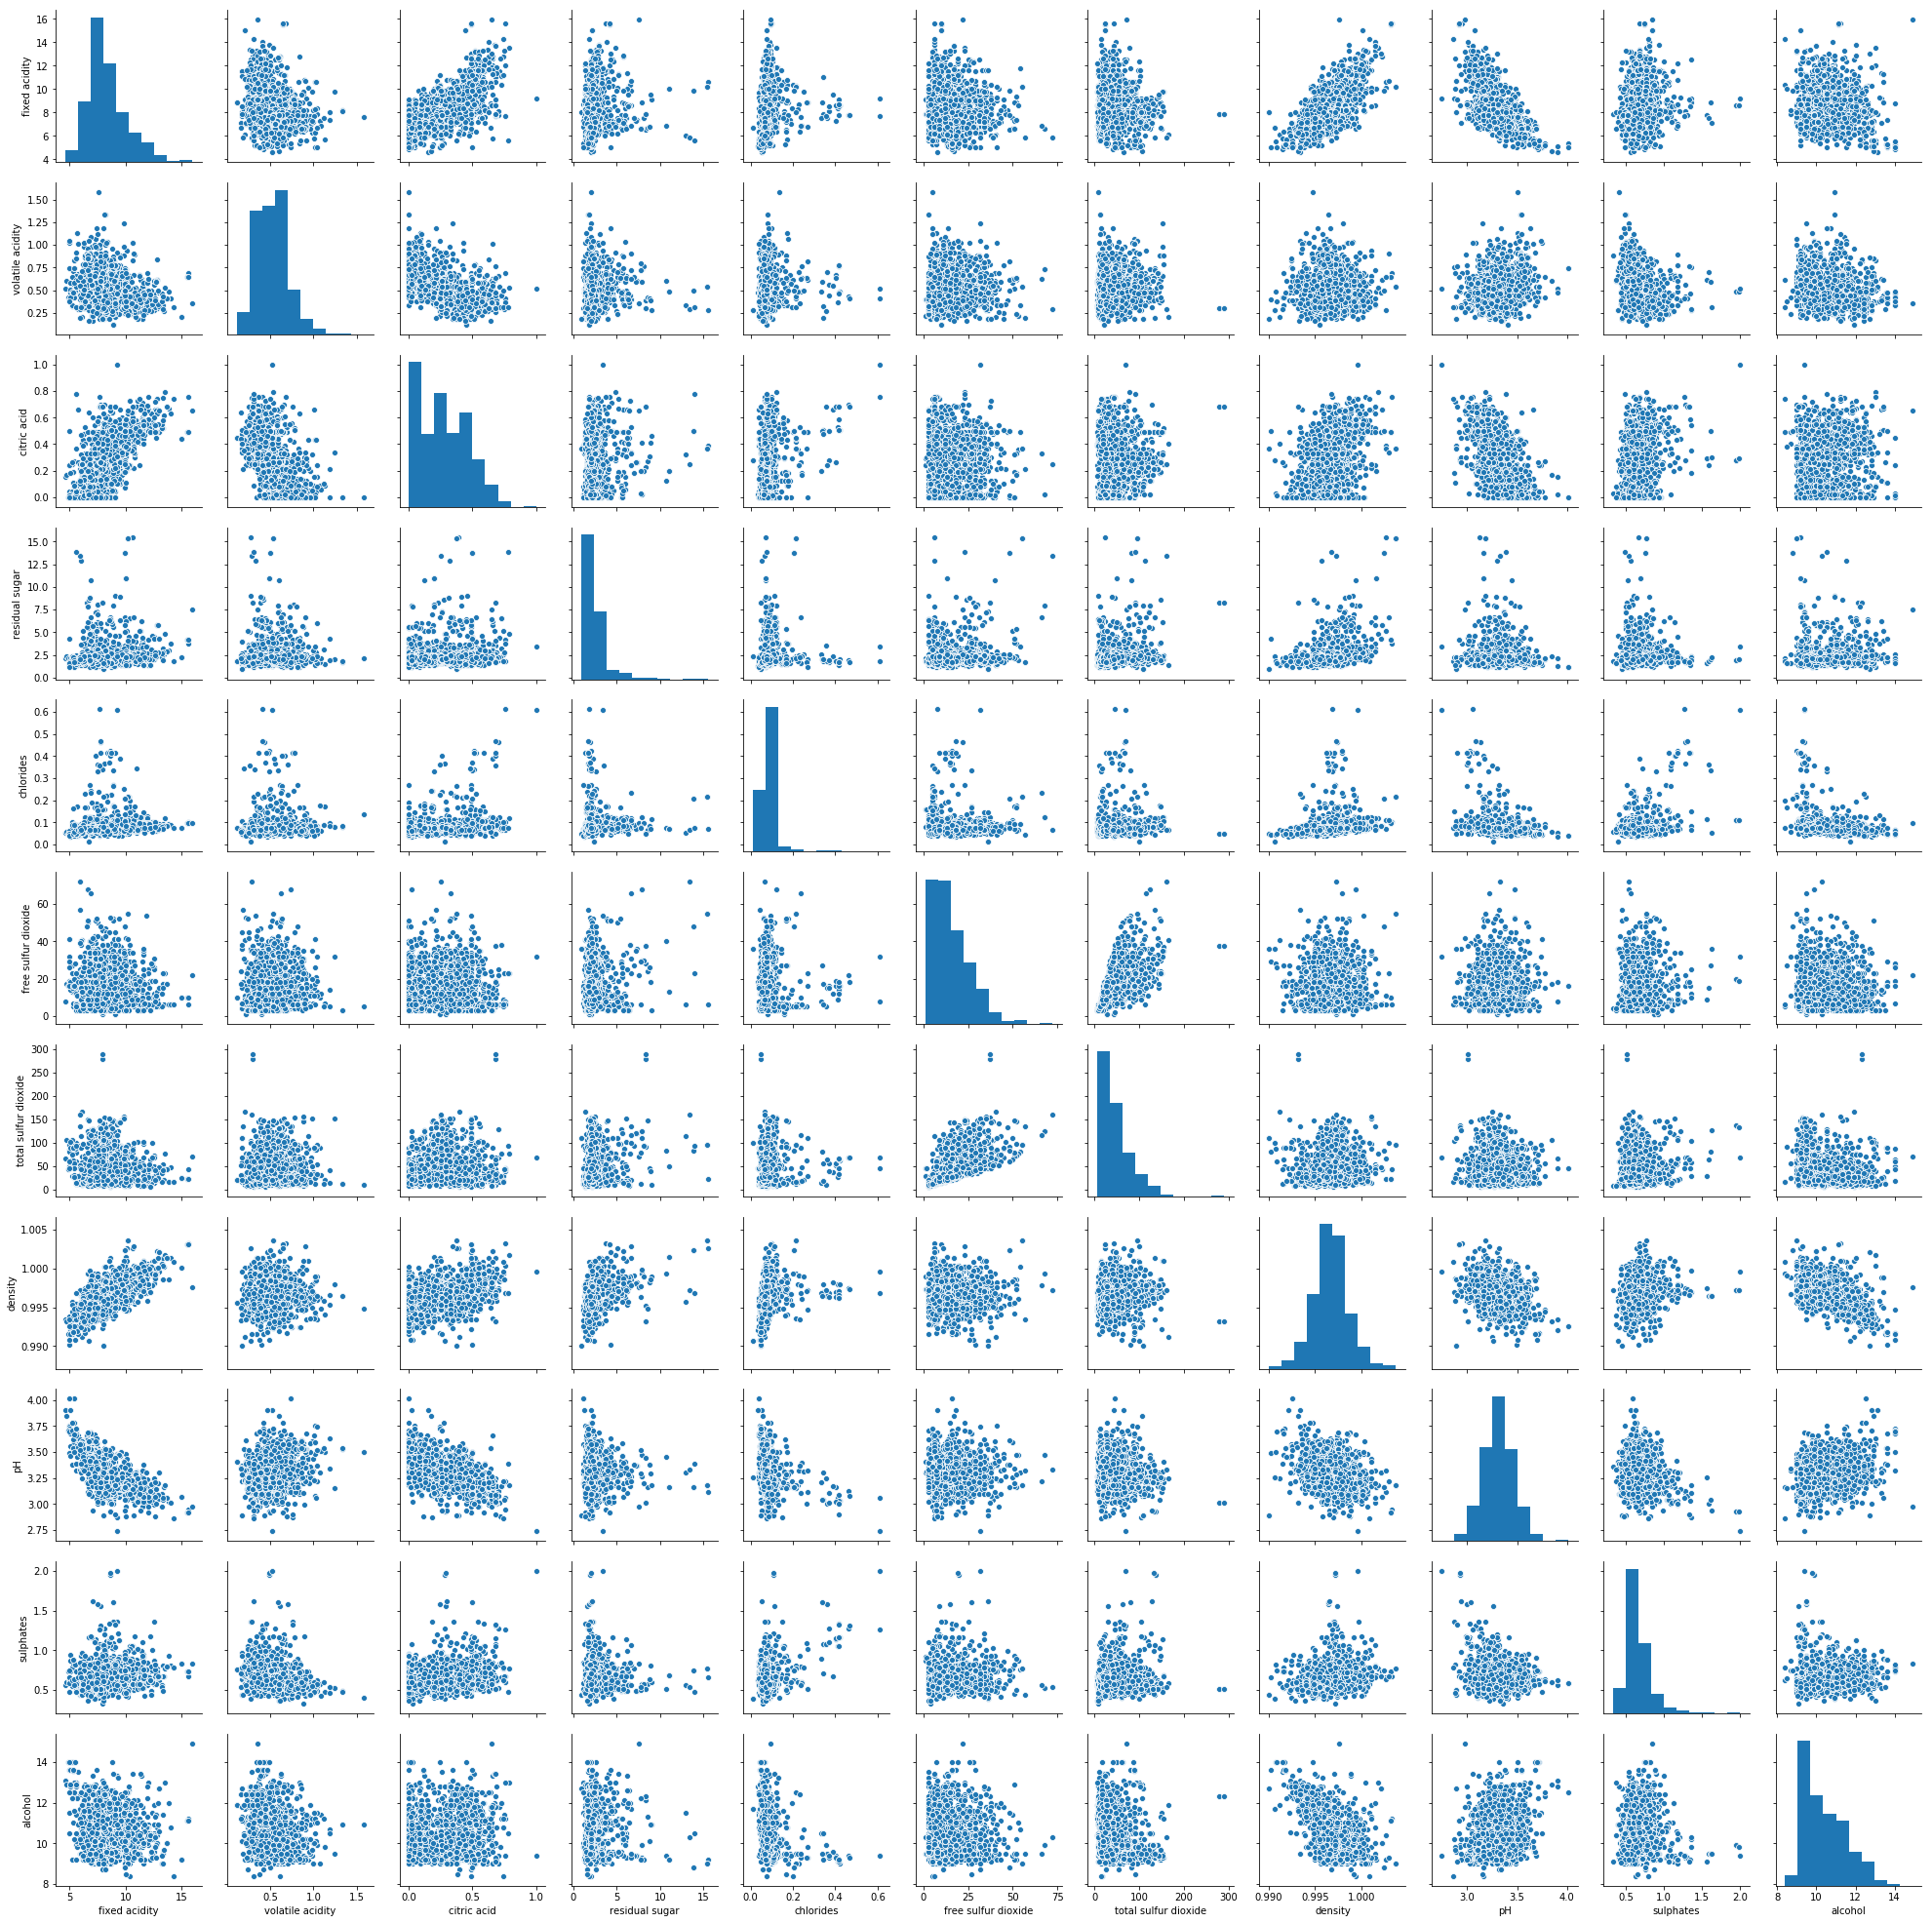

In [11]:
sns.pairplot(df_red.drop(['quality'], axis='columns'))

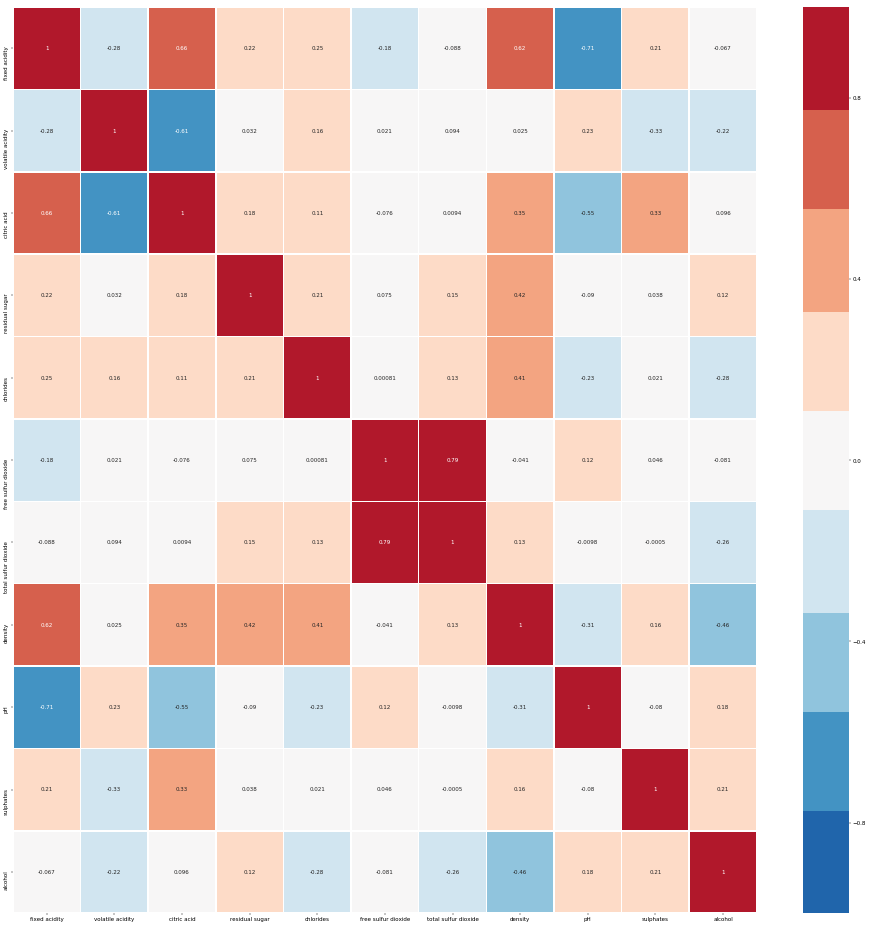

In [12]:
plt.figure(figsize=(30, 30), dpi=40)
cm_total = df_red.drop(['quality'], axis='columns').corr(method='spearman')
sns.heatmap(cm_total, center=0, annot=True, linewidths=1, vmin=-1, vmax=1, fmt='.2g', cmap=sns.color_palette("RdBu_r", 9))
plt.rcParams.update({'font.size': 20})

Используем метод корреляции Спирмена, потому что зависимости между много переменными не являются линейными.
На матрице корреляций видим, что есть сильнокоррелированные переменные, которые необходимо будет исключить из входных данных для обучения:
    free sulfur dioxide
    fixed acidity

## Целевая переменная - 'quality'

In [13]:
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Целевая функция - качество')

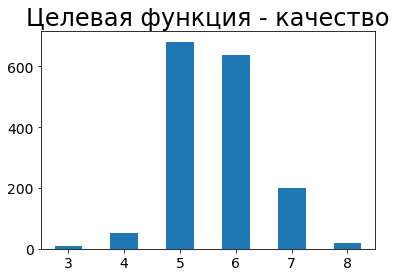

In [14]:
df_red['quality'].value_counts(sort=False).plot(kind='bar', label='quality', rot=0, fontsize=14)

plt.title('Целевая функция - качество')

In [15]:
high_quality = df_red.loc[(df_red['quality'] == 8)] 

In [16]:
high_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8


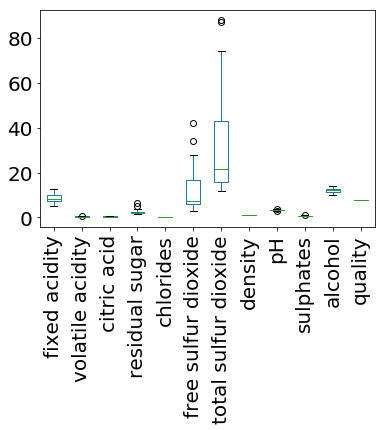

In [17]:
high_quality.plot(kind='box', rot=90)

Попробуем уменьшить количество классов

In [23]:
new_quality = []
for i in df_red['quality']:
    if i == 3 or i == 4:
        new_quality.append(1)
    elif i == 5 or i == 6:
        new_quality.append(2)
    elif i == 7 or i == 8:
        new_quality.append(3)

In [24]:
df_red['new_quality'] = new_quality

In [25]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


## Обучение с oversampling и сокращенной целевой переменной

In [26]:
X = df_red.drop(['new_quality', 'quality', 'free sulfur dioxide', 'fixed acidity'], axis='columns')
y = df_red[['new_quality']]

X_np = X.values
y_np = y.values.ravel()

In [27]:
from imblearn.over_sampling import SMOTE
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='not majority', random_state=108)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_np, y_np)

oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = X.columns.append(y.columns)

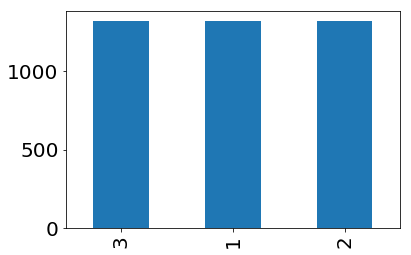

In [28]:
oversampled_train['new_quality'].value_counts().plot(kind='bar')

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(oversampled_trainX, oversampled_trainY, shuffle=True, random_state=108, test_size=0.3)


## Random Forest

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       383
           2       0.94      0.87      0.90       418
           3       0.90      0.98      0.94       387

    accuracy                           0.93      1188
   macro avg       0.94      0.94      0.93      1188
weighted avg       0.94      0.93      0.93      1188



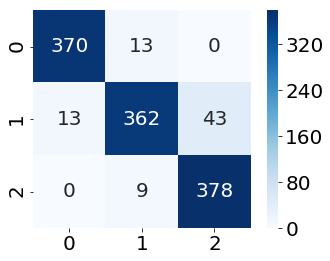

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, max_depth=30, class_weight='balanced_subsample')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)
y_pred_proba = rfc.predict_proba(X_val)

print(metrics.classification_report(y_val, y_pred))
cm = metrics.confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='0g', cmap='Blues', square=True, cbar=True)

## Обучение с oversampling и полноценной целевой переменной

In [31]:
X = df_red.drop(['new_quality', 'quality', 'free sulfur dioxide', 'fixed acidity'], axis='columns')
y = df_red[['quality']]

X_np = X.values
y_np = y.values.ravel()

In [32]:
from imblearn.over_sampling import SMOTE
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='not majority', random_state=108)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_np, y_np)

oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = X.columns.append(y.columns)

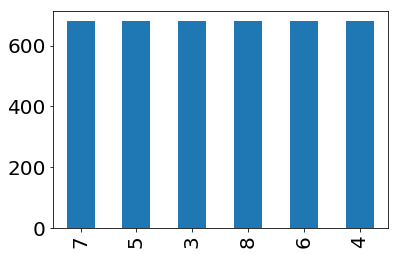

In [33]:
oversampled_train['quality'].value_counts().plot(kind='bar')

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(oversampled_trainX, oversampled_trainY, shuffle=True, random_state=108, test_size=0.3)


## Random Forest

              precision    recall  f1-score   support

           3       0.98      0.98      0.98       200
           4       0.93      0.93      0.93       205
           5       0.73      0.76      0.74       209
           6       0.74      0.57      0.65       211
           7       0.81      0.92      0.86       184
           8       0.95      1.00      0.97       217

    accuracy                           0.86      1226
   macro avg       0.86      0.86      0.86      1226
weighted avg       0.86      0.86      0.86      1226



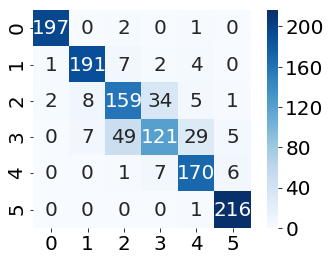

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, max_depth=30, class_weight='balanced_subsample')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)
y_pred_proba = rfc.predict_proba(X_val)

print(metrics.classification_report(y_val, y_pred))
cm = metrics.confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='0g', cmap='Blues', square=True, cbar=True)

Удалось найти работающий спосооб для классификации с высокой точностью.<br/>
Попробуем применить стратифицированную k-блочную кросс-валидацию и другие модели классификации

## Глобальные переменные

In [36]:
FOLDS_NUM = 5
RANDOM_STATE = 108

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import Pool, CatBoostClassifier
from IPython.core.display import display, HTML
from sklearn import metrics


def data_selection(X, y, FOLDS_NUM, test_size, isStandardScaler=False, random_state=RANDOM_STATE):
    ss = StandardScaler()

    skf = StratifiedKFold(n_splits=FOLDS_NUM, shuffle=True, random_state=random_state)
    
    if isStandardScaler:
        ss.fit(X)
        X_train = ss.transform(X_train)
        X_val = ss.transform(X_val)


    X_trains, X_vals, y_trains, y_vals = [], [], [], []
    for train_idx, val_idx in skf.split(X, y):
        X_trains.append(X[train_idx])
        X_vals.append(X[val_idx])
        y_trains.append(y[train_idx])
        y_vals.append(y[val_idx])
        
    print('Количество блоков: ', FOLDS_NUM, '\r\n')
    
    print('Обший размер (X):', X.shape)
    print('Общий размер (y):', y.shape, '\r\n')
    
    print('Размер тренировочной выборки (X_trains): ', X_trains[0].shape)
    print('Target для тренировочной выборки (y_trains):', y_trains[0].shape, '\r\n')
    
    print('Размер валидационной выборки (X_vals):', X_vals[0].shape)
    print('Target для валидационной выборки (y_vals):', y_vals[0].shape, '\r\n')
        
    return X_trains, y_trains, X_vals, y_vals

def cm_draw(cm, title='Consufion matrix'):
#     cm_reverse = np.flip(cm, axis=1)
#     cm_reverse = np.flip(cm_reverse, axis=0)
    plt.style.use('ggplot')
#     plt.figure(figsize=(4, 3))
    plt.figure(figsize=(5, 5))
    plt.rcParams.update({'font.size': 8})  #7
#     plt.title(title)
    sns.heatmap(cm, annot=True, fmt='0g', cmap='Blues', square=True, cbar=False)
#     plt.ylabel('Predicted', fontsize=12)
#     plt.xlabel('True', fontsize=12)
    plt.show()


def training_model(classifier, grid_param, X_trains, y_trains, X_vals, y_vals, progress=False, name_model=False):
    model = classifier()   
    
    best_metrics_val = {
        'recall_macro': 0,
        'precision_macro': 0,
        'f1_macro': 0
    }
    best_y_pred_val, best_y_pred_proba_val = [], []
    best_params_val = {}
    best_cm_val = []
    count = 0
           
    for p in ParameterGrid(grid_param):      
        model = model.set_params(**p)
        
        model_val, metrics_val, cm_all_val, y_pred_val, y_pred_proba_val = check_model_val(model, X_trains, y_trains)
        count +=1
        print('Вариант', count)
        
        if metrics_val['f1_macro'] > best_metrics_val['f1_macro']:
            best_metrics_val['recall_macro'] = metrics_val['recall_macro']
            best_metrics_val['precision_macro'] = metrics_val['precision_macro']
            best_metrics_val['f1_macro'] = metrics_val['f1_macro']

            best_y_pred_val = y_pred_val
            best_y_pred_proba_val = y_pred_proba_val

            best_cm_val = cm_all_val
            best_params_val = p
            print('The best params VAL: ' + str(p))
            print('\rf1_macro: ' + str(best_metrics_val['f1_macro']) + '\r\n')
        
    display(HTML('<h4>Кросс-валидация</h4>'))
    print('Av.Recall_macro (Val): %.3f' % best_metrics_val['recall_macro'])
    print('Av.Precision_macro (Val): %.3f' % best_metrics_val['precision_macro'])
    print('Av.F1_macro (Val): %.3f' % best_metrics_val['f1_macro'])
    print("\r\nThe best params (Val):", best_params_val)

    cm_draw(best_cm_val, 'Confusion matrix (Val), average')

    if progress:
        RESULTS_VAL[progress][name_model] = round(best_metrics_val['f1_macro'], 3)

    best_model = model.set_params(**best_params_val)
    for i in range(FOLDS_NUM):
        best_model = best_model.fit(X_trains[i], y_trains[i])
  
    print(best_model)

    return best_model 

def check_model_val(model, X_trains, y_trains):
    
    metrics = {
        'recall_macro': 0,
        'precision_macro': 0,
        'f1_macro': 0
    }
    y_pred, y_pred_proba = [[] for i in range(FOLDS_NUM)], [[] for i in range(FOLDS_NUM)]
    cm_all = []
    
    for i in range(FOLDS_NUM):
        model = model.fit(X_trains[i], y_trains[i])
        y_pred[i] = model.predict(X_vals[i])
        y_pred_proba[i] = model.predict_proba(X_vals[i])
        
        metrics['recall_macro'] += recall_score(y_vals[i], y_pred[i], average='macro')
        metrics['precision_macro'] += precision_score(y_vals[i], y_pred[i], average='macro')
        metrics['f1_macro'] += f1_score(y_vals[i], y_pred[i], average='macro')

        cm_all.append(confusion_matrix(y_true=y_vals[i] , y_pred=y_pred[i]))


    metrics['recall_macro'] = metrics['recall_macro'] / FOLDS_NUM
    metrics['precision_macro'] = metrics['precision_macro'] / FOLDS_NUM
    metrics['f1_macro'] = metrics['f1_macro'] / FOLDS_NUM
    cm_all = sum(cm_all) / FOLDS_NUM
          
    return model, metrics, cm_all, y_pred, y_pred_proba


## Сетки параметров

In [38]:
RESULTS_VAL = {}

rf_grid_param = {  
    'n_estimators': [i for i in range(80, 100, 2)], 
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [i for i in range(15, 30, 2)],
    'class_weight': ['balanced', 'balanced_subsample'],
    'random_state': [RANDOM_STATE]
}
# {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 22, 'n_estimators': 94, 'random_state': 108}
# f1_macro: 0.869202140295194

lr_grid_param = {  
    'multi_class' : ['multinomial'],
    'random_state': [RANDOM_STATE],
    'penalty': ['l2', 'none'],
    'class_weight': ['balanced', None],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']
}

gb_grid_param = {  
    'n_estimators': [i for i in range(50, 100, 2)],
    'loss': ['deviance'],
    'max_depth': [i for i in range(15, 30, 2)],
    'random_state': [RANDOM_STATE]
}

ab_grid_param = {  
    'n_estimators': [i for i in range(50, 100, 2)],
    'random_state': [RANDOM_STATE],
    'algorithm': ['SAMME', 'SAMME.R']
}



## Обучение с полноценной целевой переменной и кросс-валидацией

In [39]:
X = df_red.drop(['new_quality', 'quality', 'free sulfur dioxide', 'fixed acidity'], axis='columns')
y = df_red[['quality']]

X_np = X.values
y_np = y.values.ravel()

In [40]:
sm = SMOTE(sampling_strategy='not majority', random_state=108)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_np, y_np)

oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = X.columns.append(y.columns)

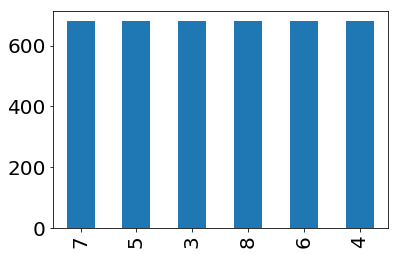

In [41]:
oversampled_train['quality'].value_counts().plot(kind='bar')

In [42]:
X_trains, y_trains, X_vals, y_vals = data_selection(oversampled_trainX, oversampled_trainY, FOLDS_NUM, 100, False)

Количество блоков:  5 

Обший размер (X): (4086, 9)
Общий размер (y): (4086,) 

Размер тренировочной выборки (X_trains):  (3264, 9)
Target для тренировочной выборки (y_trains): (3264,) 

Размер валидационной выборки (X_vals): (822, 9)
Target для валидационной выборки (y_vals): (822,) 



Вариант 1
The best params VAL: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 80, 'random_state': 108}
f1_macro: 0.859370655818467

Вариант 2
Вариант 3
The best params VAL: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 84, 'random_state': 108}
f1_macro: 0.8599509695245413

Вариант 4
The best params VAL: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 86, 'random_state': 108}
f1_macro: 0.8603088528992038

Вариант 5
Вариант 6
The best params VAL: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 90, 'random_state': 108}
f1_macro: 0.8607627505271693

Вариант 7
Вариант 8
Вариант 9
Вариант 10
Вариант 11
The best params VAL: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 17, 'n_estimators': 80, 'random_state': 108}
f1_macro: 0.8608465842118967


Av.Recall_macro (Val): 0.874
Av.Precision_macro (Val): 0.870
Av.F1_macro (Val): 0.869

The best params (Val): {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 17, 'n_estimators': 94, 'random_state': 108}


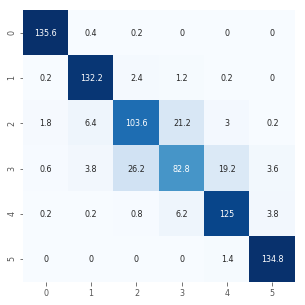

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=94, n_jobs=None, oob_score=False,
                       random_state=108, verbose=0, warm_start=False)


Вариант 1
The best params VAL: {'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 108, 'solver': 'newton-cg'}
f1_macro: 0.5323844177256054



c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~

Вариант 2


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Вариант 3


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Вариант 4


c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

Вариант 5
The best params VAL: {'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'none', 'random_state': 108, 'solver': 'newton-cg'}
f1_macro: 0.5635100688801905



c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Вариант 6


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Вариант 7


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Вариант 8
Вариант 9


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~

Вариант 10


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Вариант 11


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Вариант 12


c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

Вариант 13


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Вариант 14


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

Вариант 15


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Вариант 16


c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Av.Recall_macro (Val): 0.571
Av.Precision_macro (Val): 0.562
Av.F1_macro (Val): 0.564

The best params (Val): {'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'none', 'random_state': 108, 'solver': 'newton-cg'}


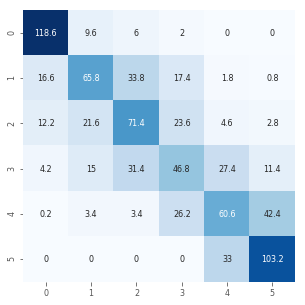

c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='none', random_state=108, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)


c:\datasc~1\virtua~1\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Вариант 1
The best params VAL: {'loss': 'deviance', 'max_depth': 15, 'n_estimators': 50, 'random_state': 108}
f1_macro: 0.8332051195597495

Вариант 2
The best params VAL: {'loss': 'deviance', 'max_depth': 15, 'n_estimators': 52, 'random_state': 108}
f1_macro: 0.8332230831345463

Вариант 3
The best params VAL: {'loss': 'deviance', 'max_depth': 15, 'n_estimators': 54, 'random_state': 108}
f1_macro: 0.8336318867748614

Вариант 4
Вариант 5
Вариант 6
Вариант 7
Вариант 8
Вариант 9
Вариант 10
Вариант 11
The best params VAL: {'loss': 'deviance', 'max_depth': 15, 'n_estimators': 70, 'random_state': 108}
f1_macro: 0.8337480254738108

Вариант 12
Вариант 13
Вариант 14
Вариант 15
Вариант 16
Вариант 17
Вариант 18
The best params VAL: {'loss': 'deviance', 'max_depth': 15, 'n_estimators': 84, 'random_state': 108}
f1_macro: 0.834022115549691

Вариант 19
Вариант 20
Вариант 21
Вариант 22
Вариант 23
Вариант 24
Вариант 25
Вариант 26
Вариант 27
Вариант 28
Вариант 29
Вариант 30
Вариант 31
Вариант 32
Вариант 

Av.Recall_macro (Val): 0.837
Av.Precision_macro (Val): 0.833
Av.F1_macro (Val): 0.834

The best params (Val): {'loss': 'deviance', 'max_depth': 15, 'n_estimators': 84, 'random_state': 108}


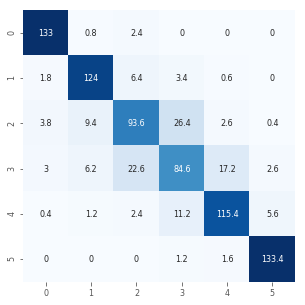

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=84,
                           n_iter_no_change=None, presort='auto',
                           random_state=108, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Вариант 1
The best params VAL: {'algorithm': 'SAMME', 'n_estimators': 50, 'random_state': 108}
f1_macro: 0.43393174439897597

Вариант 2
The best params VAL: {'algorithm': 'SAMME', 'n_estimators': 52, 'random_state': 108}
f1_macro: 0.43656758746811697

Вариант 3
The best params VAL: {'algorithm': 'SAMME', 'n_estimators': 54, 'random_state': 108}
f1_macro: 0.44663823636672084

Вариант 4
Вариант 5
Вариант 6
Вариант 7
Вариант 8
Вариант 9
Вариант 10
Вариант 11
Вариант 12
Вариант 13
Вариант 14
Вариант 15
Вариант 16
The best params VAL: {'algorithm': 'SAMME', 'n_estimators': 80, 'random_state': 108}
f1_macro: 0.4563068974516983

Вариант 17
Вариант 18
Вариант 19
The best params VAL: {'algorithm': 'SAMME', 'n_estimators': 86, 'random_state': 108}
f1_macro: 0.46442311139958437

Вариант 20
Вариант 21
Вариант 22
Вариант 23
Вариант 24
Вариант 25


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 26


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 27


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 28


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 29


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 30


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 31


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 32


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 33


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 34


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 35


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 36


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 37


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 38


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 39


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 40


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 41


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 42


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 43


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 44


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 45


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 46


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 47


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 48


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 49


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py

Вариант 50


c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\datasc~1\virtua~1\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Av.Recall_macro (Val): 0.462
Av.Precision_macro (Val): 0.506
Av.F1_macro (Val): 0.464

The best params (Val): {'algorithm': 'SAMME', 'n_estimators': 86, 'random_state': 108}


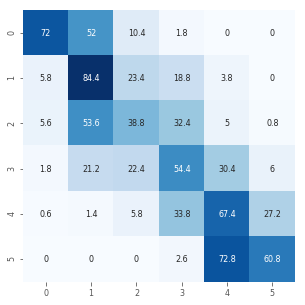

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=86, random_state=108)


In [241]:
RESULTS_VAL['1'] = {}

display(HTML('<h3>Случайный лес</h3>'))
rf_check = training_model(RandomForestClassifier, rf_grid_param, X_trains, y_trains, X_vals, y_vals, '1', 'Случайный лес')

display(HTML('<h3>Логистическая регрессия</h3>'))
lr_check = training_model(LogisticRegression, lr_grid_param, X_trains, y_trains, X_vals, y_vals, '1', 'Логистическая регрессия')

display(HTML('<h3>Градиентный бустинг</h3>'))
gb_check = training_model(GradientBoostingClassifier, gb_grid_param, X_trains, y_trains, X_vals, y_vals, '1', 'Градиентный бустинг')

display(HTML('<h3>AdaBoost</h3>'))
ab_check = training_model(AdaBoostClassifier, ab_grid_param, X_trains, y_trains, X_vals, y_vals, '1', 'AdaBoost')


In [248]:
import pickle
pickle.dump(rf_check, open('rf_check.pickle', 'wb'))

В качестве рабочей модели был выбран Random Forest, так как показал наилучшие результаты при классификации